<h4>Defining a Bollinger Bands Strategy - Daily</h4>
<h6>Is when the price crosses above or below a simple moving average to signal a potential change in trend.</h6>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Load data
def load_data(ticker: str, time_frame: str) -> None:
    ticket = yf.Ticker(f'{ticker}')
    dataset = ticket.history(period='max', interval=time_frame, auto_adjust=True).drop(columns=['Volume', 'Dividends', 'Stock Splits']).rename(columns={
        'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close'})  # periods: “1d”, “5d”, “1mo”, “3mo”, “6mo”, “1y”, “2y”, “5y”, “10y”, “ytd”, “max”
    dataset['date'] = dataset.index
    return pd.DataFrame(dataset)

# time_frames = ['1d', '5d'] # Intervals: “1m”, “2m”, “5m”, “15m”, “30m”, “60m”, “90m”, “1h”, “1d”, “5d”, “1wk”, “1mo”, “3mo”
# tickers = ['AMZN', 'AAPL', 'MSFT', 'MORN', 'XOM']
# tickers = ['AUDUSD=X', 'EURUSD=X', 'GBPUSD=X', 'GBPEUR=X', 'USDJPY=X', 'USDCAD=X', 'USDCHF=X', BZ=F]


ticker = 'GC=F'
time_frame = '1d'
data = load_data(ticker, time_frame)


<h4>Create variables</h4>
<h6>Create variables for strategy Bollinger Bands and variable that exhibt what position take</h6>

In [179]:
sma_small = 48
sma_long = 140

# Create variables SMA
data['SMA_Small'] = data['close'].rolling(sma_small).mean()
data['SMA_Long'] = data['close'].rolling(sma_long).mean()

# Create variable about postion related with strategy
data['position'] = np.where(data['SMA_Small'] > data['SMA_Long'], 1, -1)
data.dropna(inplace=True)
data

,open,high,low,close,date,SMA_Small,SMA_Long,position
Date,,,,,,,,
2001-03-22,261.100006,261.100006,261.100006,261.100006,2001-03-22,262.933332,267.573570,-1
2001-03-23,261.500000,261.500000,261.500000,261.500000,2001-03-23,262.883332,267.484999,-1
2001-03-26,261.899994,261.899994,261.899994,261.899994,2001-03-26,262.854165,267.367856,-1
2001-03-27,261.000000,261.000000,261.000000,261.000000,2001-03-27,262.808332,267.253571,-1
2001-03-28,259.700012,259.700012,259.700012,259.700012,2001-03-28,262.714582,267.138571,-1
...,...,...,...,...,...,...,...,...
2022-01-25,1843.000000,1852.699951,1842.000000,1852.699951,2022-01-25,1804.599991,1795.497134,1
2022-01-26,1829.900024,1829.900024,1829.900024,1829.900024,2022-01-26,1803.770826,1795.639277,1
2022-01-27,1793.300049,1793.300049,1793.300049,1793.300049,2022-01-27,1802.360410,1795.552134,1


<h4>Plot Close price with SMA</h4>

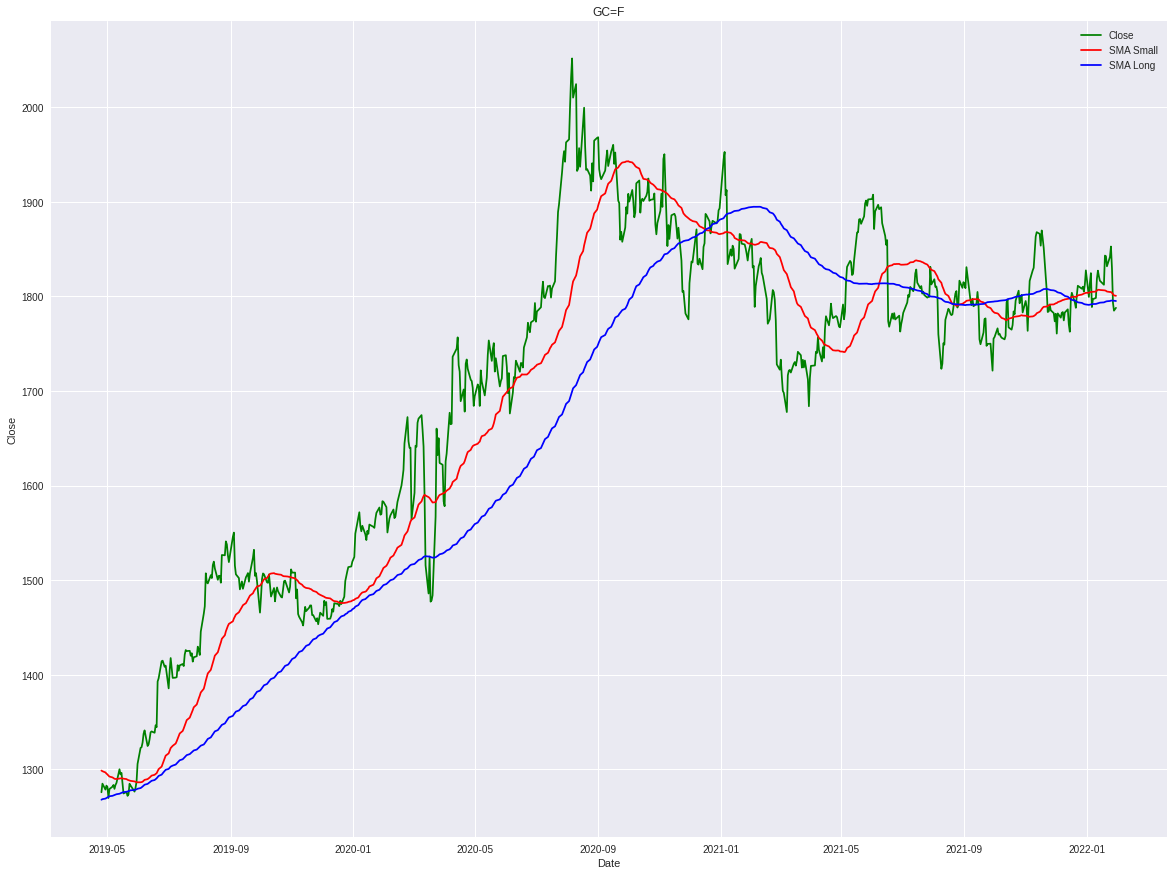

In [180]:
plt.figure(figsize=(20,15))
plt.title(ticker)
plt.plot(data['close'].tail(700), color='g', label='Close')
plt.plot(data['SMA_Small'].tail(700), color='r', label='SMA Small')
plt.plot(data['SMA_Long'].tail(700), color='b', label='SMA Long')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

<h4>Plot the Strategy</h4>

<AxesSubplot:xlabel='Date'>

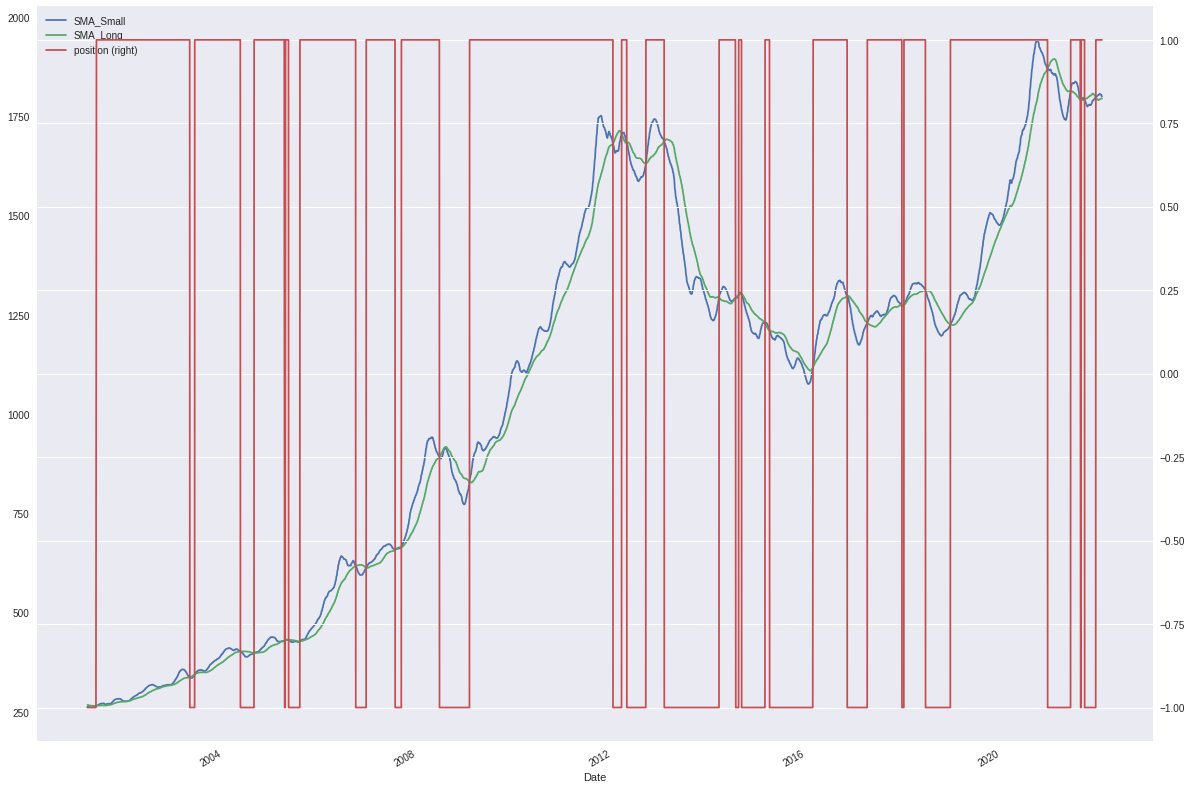

In [181]:
data.loc[:, ['SMA_Small', 'SMA_Long', 'position']].plot(figsize=(20, 15), secondary_y='position')

<h4>Strategy backtesting</h4>
<h6>Create variables that exhibit return and returns of strategy</h6>

In [182]:
data['returns'] = np.log(data['close'] / data['close'].shift(1))
data['strategy'] = data['position'].shift(1) * data['returns']
data

,open,high,low,close,date,SMA_Small,SMA_Long,position,returns,strategy
Date,,,,,,,,,,
2001-03-22,261.100006,261.100006,261.100006,261.100006,2001-03-22,262.933332,267.573570,-1,NaN,NaN
2001-03-23,261.500000,261.500000,261.500000,261.500000,2001-03-23,262.883332,267.484999,-1,0.001531,-0.001531
2001-03-26,261.899994,261.899994,261.899994,261.899994,2001-03-26,262.854165,267.367856,-1,0.001528,-0.001528
2001-03-27,261.000000,261.000000,261.000000,261.000000,2001-03-27,262.808332,267.253571,-1,-0.003442,0.003442
2001-03-28,259.700012,259.700012,259.700012,259.700012,2001-03-28,262.714582,267.138571,-1,-0.004993,0.004993
...,...,...,...,...,...,...,...,...,...,...
2022-01-25,1843.000000,1852.699951,1842.000000,1852.699951,2022-01-25,1804.599991,1795.497134,1,0.005955,0.005955
2022-01-26,1829.900024,1829.900024,1829.900024,1829.900024,2022-01-26,1803.770826,1795.639277,1,-0.012383,-0.012383
2022-01-27,1793.300049,1793.300049,1793.300049,1793.300049,2022-01-27,1802.360410,1795.552134,1,-0.020204,-0.020204


<h4>Absolute Strategy</h4>

In [183]:
data[['returns', 'strategy']].sum()

returns     1.923894
strategy    1.766726
dtype: float64

<h4>Annualized Return</h4>

In [184]:
data[['returns', 'strategy']].mean() * 252

returns     0.092629
strategy    0.085062
dtype: float64

<h4>Annualized Risk</h4>

In [185]:
data[['returns', 'strategy']].std() * np.sqrt(252)

returns     0.177279
strategy    0.177294
dtype: float64

<h4>Cummulative Return</h4>

In [186]:
data['cummulative_returns'] = data['returns'].cumsum().apply(np.exp)
data['cummulative_strategy'] = data['strategy'].cumsum().apply(np.exp)
data[['cummulative_returns', 'cummulative_strategy']]

,cummulative_returns,cummulative_strategy
Date,,
2001-03-22,NaN,NaN
2001-03-23,1.001532,0.998470
2001-03-26,1.003064,0.996945
2001-03-27,0.999617,1.000383
2001-03-28,0.994638,1.005391
...,...,...
2022-01-25,7.095748,6.063748
2022-01-26,7.008426,5.989125
2022-01-27,6.868250,5.869336


<h4>Plot Cummulative Returns and Cummulative Strategy</h4>
<h6>Comparing Buy and Hold X SMA Crossover</h6>

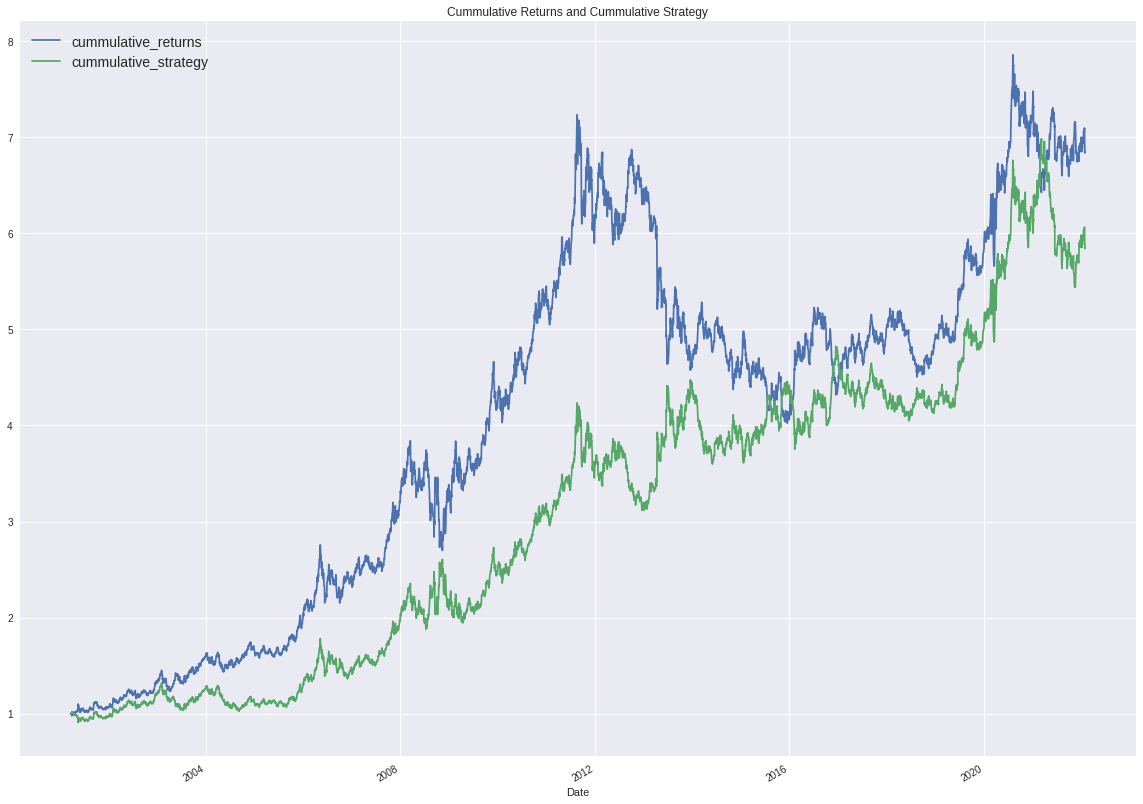

In [187]:
data[['cummulative_returns', 'cummulative_strategy']].plot(figsize=(20, 15), title='Cummulative Returns and Cummulative Strategy')
plt.legend(fontsize=14)
plt.show()

<h4>Outperformed</h4>

In [188]:
outperform = data['cummulative_strategy'].iloc[-1] - data['cummulative_returns'].iloc[-1]
outperform

-0.9959054499311488

<h4>Finding the optimal SMA strategy</h4>
<h6>Create a funtion that use various parameters to test SMA strategy and verify what work better</h6>

In [189]:
def strategy_sma(SMA: int) -> float:
    dataset = data.copy()
    dataset['returns'] = np.log(dataset['close'] / dataset['close'].shift(1))
    dataset['SMA_Small'] = dataset['close'].rolling(int(SMA[0])).mean()
    dataset['SMA_Long'] = dataset['close'].rolling(int(SMA[1])).mean()

    dataset['position'] = np.where(dataset['SMA_Small'] > dataset['SMA_Long'], 1, -1)
    dataset['strategy'] = dataset['position'].shift(1) * dataset['returns']
    dataset.dropna(inplace=True)
    return np.exp(dataset['strategy'].sum())

for s in range(20, 50):
    for l in range(60, 250):
        performance = strategy_sma((s, l))
        if performance > 5:
            print(performance, s, l)


# 2.519421098895718 SMA_Small: 46 SMA_Long: 137 - EURUSD=X
# 3.1440288287910647 SMA_Small: 46 SMA_Long: 98 - USDJPY=X
# 3.1062960084222473 SMA_Small: 46 SMA_Long: 99 - USDJPY=X
# 3.019616410585666 SMA_Small: 46 SMA_Long: 100 - USDJPY=X
# 19.091428800612846 SMA_Small: 20 SMA_Long: 60 - BZ=F (Brent)
# 16.07293047467796 SMA_Small: 20 SMA_Long: 61 - BZ=F (Brent)
# 6.021305346565676 SMA_Small: 48 SMA_Long: 140 - GC=F (Gold)
# 5.754172354225405 SMA_Small: 48 SMA_Long: 141 - GC=F (Gold)

5.098677876784567 44 146
5.042172781965409 45 141
5.340282166446662 45 142
5.301555132312934 46 142
5.072202970153274 47 139
5.059816561844504 47 140
5.168799888410818 47 141
5.02817927929678 48 138
5.395727964774532 48 139
5.833044964538725 48 140
5.652999474515371 48 141
5.237237945082055 49 138
5.189915206741705 49 139
